In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
!ls ../dilution/results_bulk_supplement/ps_2_pd_1

# ps=2, pd=1 example

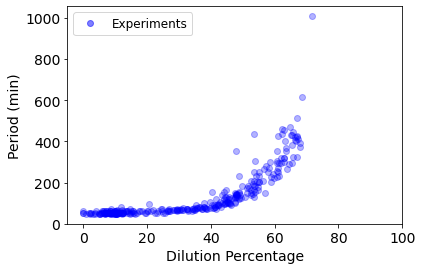

In [36]:
data_path = "../dilution/"
# Bulk Simulation with decay
bulk_path = "results_bulk_supplement/ps_2_pd_1/dilution.npz"
bulk = np.load(data_path + bulk_path, allow_pickle=True)
bulk_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
bulk_period = np.array(bulk_period)
# Bulk Simulation without decay
bulk_nd_path = "results_bulk_no_decay/bulk_no_decay.npz"
bulk_nd = np.load(data_path + bulk_nd_path, allow_pickle=True)
bulk_nd_period = [d['Per'] if d is not None else np.NaN for d in bulk_nd['feature_list']]
bulk_nd_period = np.array(bulk_nd_period)
# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']

fig = plt.figure()
ax = plt.gca()
#ax.plot(100*(1-bulk['dil_list']), bulk_period, color='red', linewidth=3, 
#        label=r'$p_{s}=2$ and $p_{d}=1$', zorder=1)
#ax.plot(100*(1-bulk_nd['dil_list']), bulk_nd_period, color='green', linewidth=3, 
#        label='$p_{s}=0$ and $p_{d}=0$', zorder=1)
# Experimental data
plt.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Experiments' )
ax.tick_params(labelsize=14)
#ax.lines[-1].set_label('Experiments')
ax.set_xlim([-5, 100])
ax.set_xlabel('Dilution Percentage', fontsize=14)
ax.set_ylabel('Period (min)', fontsize=14)
leg = ax.legend(loc='upper left', fontsize=12)
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(0.5)
#plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
plt.savefig('./PNGs/supp_exp_per.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

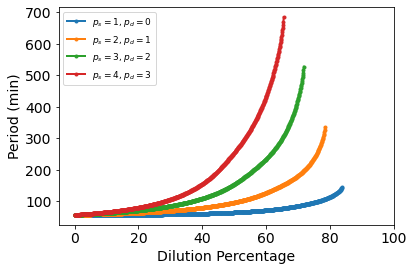

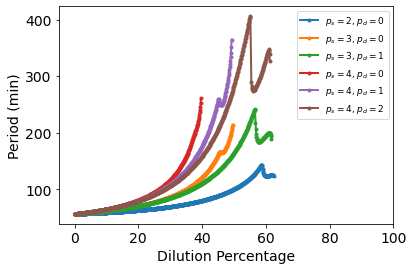

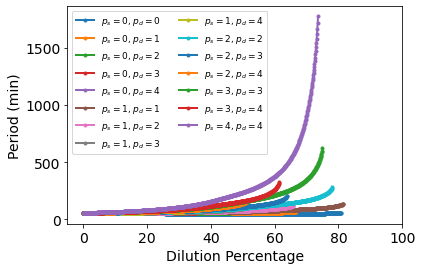

In [31]:
fig1 = plt.figure(1)
ax1 = fig1.gca()
fig2 = plt.figure(2)
ax2 = fig2.gca()
fig3 = plt.figure(3)
ax3 = fig3.gca()
data_path = "../dilution/"
for i in range(5):
    for j in range(5):
        # Bulk Simulation with decay
        bulk_path = f"results_bulk_supplement/ps_{i}_pd_{j}/ps_{i}_pd_{j}.npz"
        bulk = np.load(data_path + bulk_path, allow_pickle=True)
        aux_dil = bulk['dil_list'].tolist()
        aux_amplitude = [d['Amp'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
        pa = list(zip(aux_dil, aux_period, aux_amplitude))
        # Show results up to the peak period
        result = [l for l in pa if l[2] > 0.0] #  0.25]
        dil, per, amp = zip(*result)
        bulk_dil = np.array(dil)
        bulk_period = np.array(per)
        if i == j + 1:
            ax1.plot(100*(1-bulk_dil), bulk_period, linewidth=2, marker='o', markersize=3, 
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        elif i > j:
            ax2.plot(100*(1-bulk_dil), bulk_period, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        else: 
            ax3.plot(100*(1-bulk_dil), bulk_period, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
            
ax1.tick_params(labelsize=14)
ax1.set_xlim([-5, 100])
ax1.set_xlabel('Dilution Percentage', fontsize=14)
ax1.set_ylabel('Period (min)', fontsize=14)

ax2.tick_params(labelsize=14)
ax2.set_xlim([-5, 100])
ax2.set_xlabel('Dilution Percentage', fontsize=14)
ax2.set_ylabel('Period (min)', fontsize=14)

ax3.tick_params(labelsize=14)
ax3.set_xlim([-5, 100])
ax3.set_xlabel('Dilution Percentage', fontsize=14)
ax3.set_ylabel('Period (min)', fontsize=14)


# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
'''
ax1.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Experiment' )
ax2.plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Experiment' )
'''# plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
ax1.legend(loc='upper left', fontsize=9, ncol=1)#, bbox_to_anchor=(1.1, 1.0))
ax2.legend(loc='upper right', fontsize=9, ncol=1)#, bbox_to_anchor=(1.1, 1.0))
ax3.legend(loc='upper left', fontsize=9, ncol=2)#, bbox_to_anchor=(1.1, 1.0))

fig1.savefig('./PNGs/supp_ps_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig2.savefig('./PNGs/supp_ps_great_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig3.savefig('./PNGs/supp_ps_lesseq_pd.png', format='png', bbox_inches='tight', dpi=300)

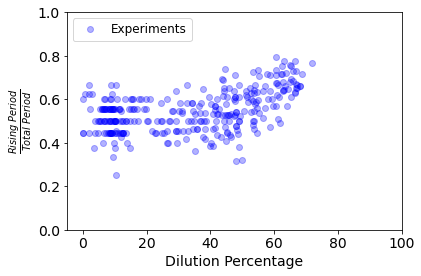

In [6]:
import matplotlib as mpl
fig1 = plt.figure(1)
ax1 = fig1.gca()
           
ax1.tick_params(labelsize=14)
ax1.set_xlim([-5, 100])
ax1.set_xlabel('Dilution Percentage', fontsize=14)
ax1.set_ylabel(r'$\frac{Rising \ Period}{Total \ Period}$', fontsize=14)


# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak','timeLeft','timeRight']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
rdata = points.loc[aux['cycleID'] == cycle]['timeLeft']
fdata = points.loc[aux['cycleID'] == cycle]['timeRight']
factor_data = (rdata - fdata)# /(rdata + fdata)
factor_data = rdata/(rdata + fdata)

ax1.plot(xdata, factor_data, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Experiments' )
ax1.set_ylim([0,1])
ax1.legend(loc='upper left', fontsize=12, ncol=2)#, bbox_to_anchor=(1.1, 1.0))
# plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
plt.savefig('./PNGs/supp_rising_tot_exp.png', format='png', bbox_inches='tight', dpi=300)

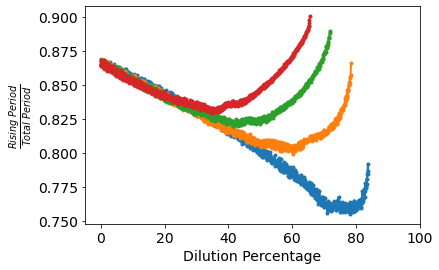

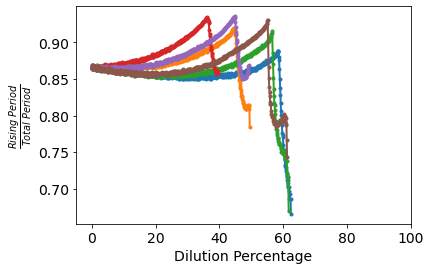

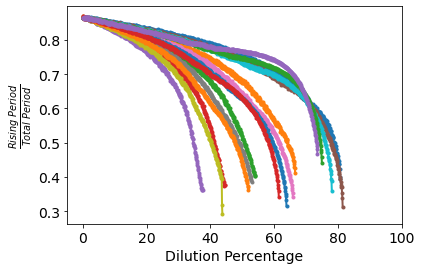

In [32]:
fig1 = plt.figure(1)
ax1 = fig1.gca()
fig2 = plt.figure(2)
ax2 = fig2.gca()
fig3 = plt.figure(3)
ax3 = fig3.gca()
data_path = "../dilution/"
for i in range(5):
    for j in range(5):
        # Bulk Simulation with decay
        bulk_path = f"results_bulk_supplement/ps_{i}_pd_{j}/ps_{i}_pd_{j}.npz"
        bulk = np.load(data_path + bulk_path, allow_pickle=True)
        aux_dil = bulk['dil_list'].tolist()
        aux_amplitude = [d['Amp'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_rising = [d['Rise'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_falling = [d['Fall'] if d is not None else np.NaN for d in bulk['feature_list']]
        pa = list(zip(aux_dil, aux_rising, aux_falling, aux_amplitude))
        # Show results up to the peak period
        result = [l for l in pa if l[3] > 0.0]# 0.25]
        dil, rise, fall, amp = zip(*result)
        bulk_dil = np.array(dil)
        bulk_rising = np.array(rise)
        bulk_falling = np.array(fall)
        factor = (bulk_rising - bulk_falling)# /(bulk_rising + bulk_falling)
        factor = bulk_rising/(bulk_rising + bulk_falling)
        #factor = bulk_rising/bulk_falling
        if i == j + 1:
            ax1.plot(100*(1-bulk_dil), factor, linewidth=2, marker='o', markersize=3, 
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        elif i > j:
            ax2.plot(100*(1-bulk_dil), factor, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        else: 
            ax3.plot(100*(1-bulk_dil), factor, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
ax1.tick_params(labelsize=14)
ax1.set_xlim([-5, 100])
ax1.set_xlabel('Dilution Percentage', fontsize=14)
ax1.set_ylabel(r'$\frac{Rising \ Period}{Total \ Period}$', fontsize=14)

ax2.tick_params(labelsize=14)
ax2.set_xlim([-5, 100])
ax2.set_xlabel('Dilution Percentage', fontsize=14)
ax2.set_ylabel(r'$\frac{Rising \ Period}{Total \ Period}$', fontsize=14)

ax3.tick_params(labelsize=14)
ax3.set_xlim([-5, 100])
ax3.set_xlabel('Dilution Percentage', fontsize=14)
ax3.set_ylabel(r'$\frac{Rising \ Period}{Total \ Period}$', fontsize=14)
'''
ax1.set_ylim([0,1])
ax2.set_ylim([0,1])
ax3.set_ylim([0,1])

'''#ax1.legend(loc='upper left', fontsize=12, ncol=2, bbox_to_anchor=(1.1, 1.0))
#ax2.legend(loc='upper left', fontsize=12, ncol=2, bbox_to_anchor=(1.1, 1.0))

# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak','timeLeft','timeRight']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
rdata = points.loc[aux['cycleID'] == cycle]['timeLeft']
fdata = points.loc[aux['cycleID'] == cycle]['timeRight']
factor_data = (rdata - fdata)# /(rdata + fdata)
factor_data = rdata/(rdata + fdata)
#factor_data = rdata / fdata

'''
ax1.plot(xdata, factor_data, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )
ax2.plot(xdata, factor_data, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )

'''
# plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
# fig1.savefig('./PNGs/supp_fraction_ps_great_pd.png', format='png', bbox_inches='tight', dpi=300)
# fig2.savefig('./PNGs/supp_fraction_ps_less_pd.png', format='png', bbox_inches='tight', dpi=300)

fig1.savefig('./PNGs/supp_frac__ps_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig2.savefig('./PNGs/supp_frac__ps_great_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig3.savefig('./PNGs/supp_frac__ps_lesseq_pd.png', format='png', bbox_inches='tight', dpi=300)

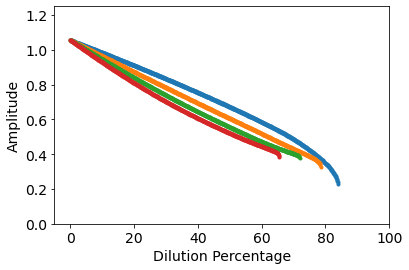

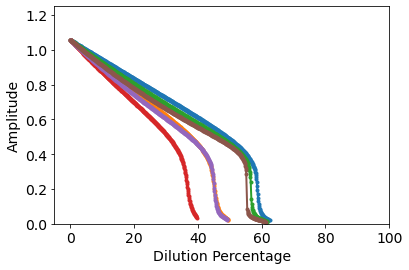

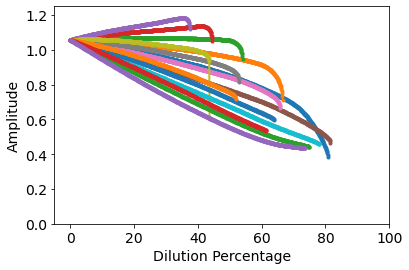

In [33]:
fig1 = plt.figure(1)
ax1 = fig1.gca()
fig2 = plt.figure(2)
ax2 = fig2.gca()
fig3 = plt.figure(3)
ax3 = fig3.gca()
data_path = "../dilution/"
for i in range(5):
    for j in range(5):
        # Bulk Simulation with decay
        bulk_path = f"results_bulk_supplement/ps_{i}_pd_{j}/ps_{i}_pd_{j}.npz"
        bulk = np.load(data_path + bulk_path, allow_pickle=True)
        aux_dil = bulk['dil_list'].tolist()
        aux_amplitude = [d['Amp'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_rising = [d['Rise'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_falling = [d['Fall'] if d is not None else np.NaN for d in bulk['feature_list']]
        pa = list(zip(aux_dil, aux_rising, aux_falling, aux_amplitude))
        # Show results up to the peak period
        result = [l for l in pa if l[3] > 0.0]# 0.25]
        dil, rise, fall, amp = zip(*result)
        bulk_dil = np.array(dil)
        bulk_rising = np.array(rise)
        bulk_falling = np.array(fall)
        factor = (bulk_rising - bulk_falling)# /(bulk_rising + bulk_falling)
        factor = bulk_rising/(bulk_rising + bulk_falling)
        if i == j + 1:
            ax1.plot(100*(1-bulk_dil), amp, linewidth=2, marker='o', markersize=3, 
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        elif i > j:
            ax2.plot(100*(1-bulk_dil), amp, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
        else: 
            ax3.plot(100*(1-bulk_dil), amp, linewidth=2, marker='o', markersize=3,
                    label=r'$p_{s}='+str(i)+r'$, $p_{d}='+str(j)+r'$', zorder=1)
            
ax1.tick_params(labelsize=14)
ax1.set_xlim([-5, 100])
ax1.set_xlabel('Dilution Percentage', fontsize=14)
ax1.set_ylabel('Amplitude', fontsize=14)

ax2.tick_params(labelsize=14)
ax2.set_xlim([-5, 100])
ax2.set_xlabel('Dilution Percentage', fontsize=14)
ax2.set_ylabel('Amplitude', fontsize=14)

ax3.tick_params(labelsize=14)
ax3.set_xlim([-5, 100])
ax3.set_xlabel('Dilution Percentage', fontsize=14)
ax3.set_ylabel('Amplitude', fontsize=14)

ax1.set_ylim([0,1.25])
ax2.set_ylim([0,1.25])
ax3.set_ylim([0,1.25])

#ax1.legend(loc='upper left', fontsize=12, ncol=2, bbox_to_anchor=(1.1, 1.0))
#ax2.legend(loc='upper left', fontsize=12, ncol=2, bbox_to_anchor=(1.1, 1.0))

# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak','timeLeft','timeRight']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
rdata = points.loc[aux['cycleID'] == cycle]['timeLeft']
fdata = points.loc[aux['cycleID'] == cycle]['timeRight']
factor_data = (rdata - fdata)# /(rdata + fdata)
factor_data = rdata/(rdata + fdata)
#factor_data = rdata / fdata

'''
ax1.plot(xdata, factor_data, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )
ax2.plot(xdata, factor_data, 'o', rasterized=True, 
        alpha = 0.3, color='b', zorder=0, label = 'Droplet Experiments' )

'''
# plt.savefig('./SVGs/supp_ps_2_pd_1.svg', format='svg', bbox_inches='tight')
# fig1.savefig('./PNGs/supp_fraction_ps_great_pd.png', format='png', bbox_inches='tight', dpi=300)
# fig2.savefig('./PNGs/supp_fraction_ps_less_pd.png', format='png', bbox_inches='tight', dpi=300)


fig1.savefig('./PNGs/supp_amp_ps_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig2.savefig('./PNGs/supp_amp_ps_great_pd_one.png', format='png', bbox_inches='tight', dpi=300)
fig3.savefig('./PNGs/supp_amp_ps_lesseq_pd.png', format='png', bbox_inches='tight', dpi=300)

In [ ]:
data_path = "../dilution/"
for i in range(5):
    for j in range(5):
        # Bulk Simulation with decay
        bulk_path = f"results_bulk_supplement/ps_{i}_pd_{j}/ps_{i}_pd_{j}.npz"
        bulk = np.load(data_path + bulk_path, allow_pickle=True)
        bulk_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
        bulk_amplitude = [d['Amp'] if d is not None else np.NaN for d in bulk['feature_list']]
        bulk_period = np.array(bulk_period)
        bulk_amplitude = np.array(bulk_amplitude)
        plt.plot(100*(1-bulk['dil_list']), bulk_period, linewidth=3, 
                 label=r'$p_{s}='+str(i)+r'$ and $p_{d}='+str(j)+r'$', zorder=1)
        plt.legend()
        plt.show()
        plt.plot(100*(1-bulk['dil_list']), bulk_amplitude, linewidth=3, 
                    label=r'$p_{s}='+str(i)+r'$ and $p_{d}='+str(j)+r'$', zorder=1)
        plt.legend()
        plt.show() 
ax1.tick_params(labelsize=14)
ax1.set_xlim([-5, 100])
ax1.set_xlabel('Dilution Percentage', fontsize=14)
ax1.set_ylabel('Fraction of the period', fontsize=14)

ax1.legend(loc='upper left', fontsize=12, ncol=2, bbox_to_anchor=(1.1, 1.0))

# Experimental Data
exp_path = '../experimental_data/dilution_period/01_06_21_0uM-Cdc25.txt'
aux = pd.read_csv(exp_path)
cycle = 2
points = aux[['cycleID','dilutionPer','periodPeak','timeLeft','timeRight']].dropna()
xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
rdata = points.loc[aux['cycleID'] == cycle]['timeLeft']
fdata = points.loc[aux['cycleID'] == cycle]['timeRight']
factor_data = (rdata - fdata)# /(rdata + fdata)
factor_data = rdata/(rdata + fdata)
#factor_data = rdata / fdata


# Experimental data

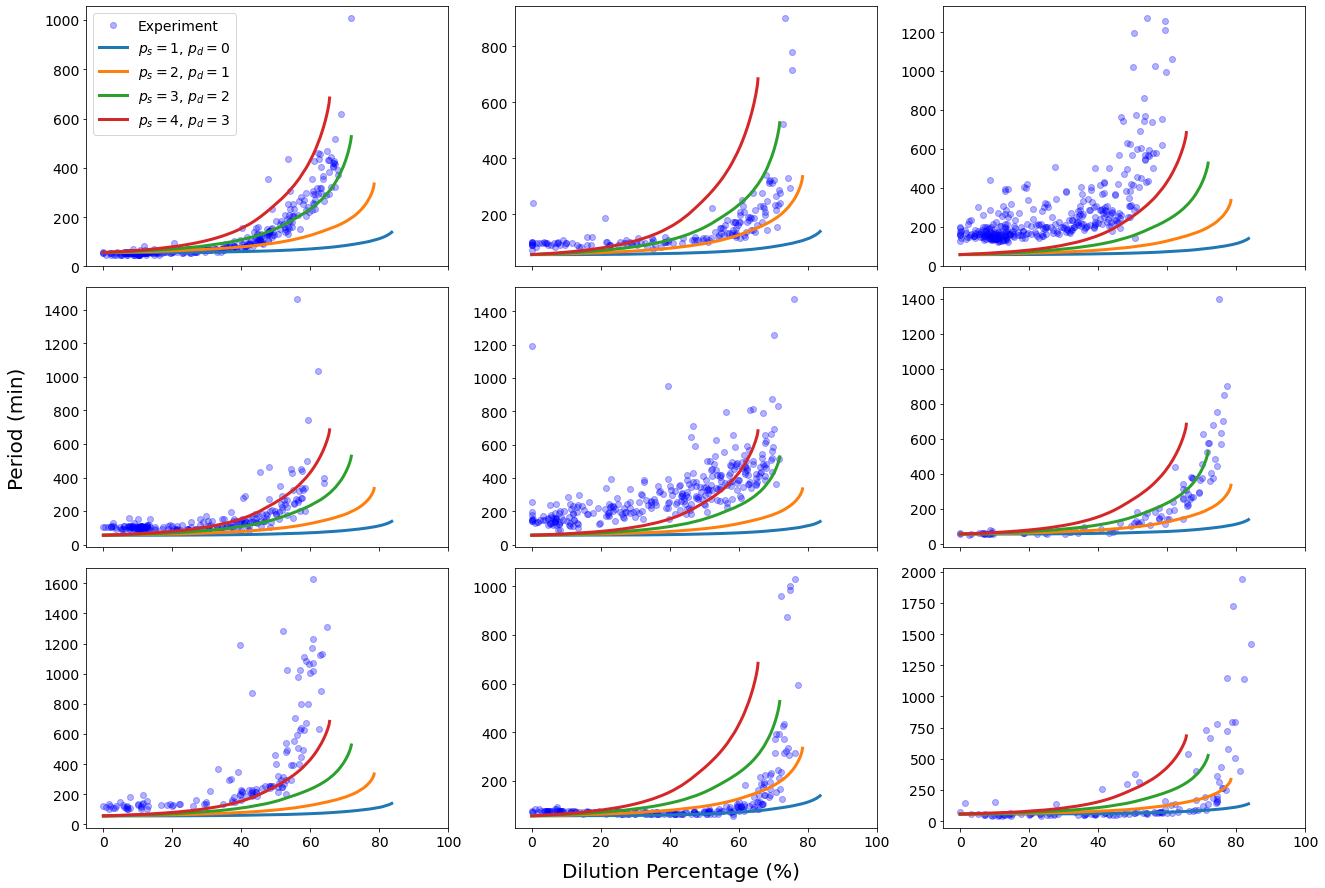

In [43]:
file_names = ['01_06_21_0uM-Cdc25.txt', '06_28_20_0um_Dilu.txt', '11_11_20_0um_Dilu.txt',
              '01_20_21_0um_Dilu.txt', '07_29_20_0um_Dilu.txt', '03_18_20_0um_Dilu.txt',
              '08_10_20_0um_Dilu.txt', '06_22_20_0um_Dilu.txt', '09_03_20_0um_Dilu.txt']
selected_curves = [(1, 0), (2,1), (3,2), (4,3)]
fig, ax_arr = plt.subplots(3, 3, sharex=True, sharey=False, figsize=(18,12))
axs = ax_arr.flatten()
for i,f in enumerate(file_names):
    exp_path = '../experimental_data/dilution_period/' + f
    aux = pd.read_csv(exp_path)
    cycle = 2
    points = aux[['cycleID','dilutionPer','periodPeak','timeLeft','timeRight']].dropna()
    xdata = points.loc[aux['cycleID'] == cycle]['dilutionPer']
    ydata = points.loc[aux['cycleID'] == cycle]['periodPeak']
    # Experimental data
    axs[i].plot(xdata, aux['frameStep'][0]*ydata, 'o', rasterized=True, 
            alpha = 0.3, color='b', zorder=0, label = 'Experiment' )
    #ax.tick_params(labelsize=14)
    #ax.lines[-1].set_label('Experiments')
    axs[i].set_xlim([-5, 100])
    #axs[i].set_yscale('log')
    
    # Reference period for rescaling
    
    # Add to each plot the selected curves
    for sc in selected_curves:
        bulk_path = f"results_bulk_supplement/ps_{sc[0]}_pd_{sc[1]}/ps_{sc[0]}_pd_{sc[1]}.npz"
        bulk = np.load(data_path + bulk_path, allow_pickle=True)
        aux_dil = bulk['dil_list'].tolist()
        aux_amplitude = [d['Amp'] if d is not None else np.NaN for d in bulk['feature_list']]
        aux_period = [d['Per'] if d is not None else np.NaN for d in bulk['feature_list']]
        pa = list(zip(aux_dil, aux_period, aux_amplitude))
        # Show results up to the peak period
        result = [l for l in pa if l[2] > 0.25]
        dil, per, amp = zip(*result)
        bulk_dil = np.array(dil)
        bulk_period = np.array(per)
        axs[i].plot(100*(1-bulk_dil), bulk_period, linewidth=3, 
                    label=r'$p_{s}='+str(sc[0])+r'$, $p_{d}='+str(sc[1])+r'$', zorder=1) 
        axs[i].tick_params(labelsize=14)
    if i == 0:
        axs[i].legend(fontsize=14)
fig.tight_layout()
fig.text(0.5, -0.02, 'Dilution Percentage (%)', ha='center', fontsize=20)
fig.text(-0.02, 0.5, 'Period (min)', va='center', rotation='vertical', fontsize=20)
fig.savefig('./PNGs/supp_exp_comparison.png', format='png', bbox_inches='tight', dpi=300)